In [1]:
import numpy as np, scipy, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
sns.set(style='whitegrid')
import IPython.display as ipd
%run detect_peaks.py
plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib inline

In [5]:
import librosa, librosa.display

In [3]:
x, sr = librosa.load('P2_Exrpt.wav')
ipd.Audio(x, rate=sr)

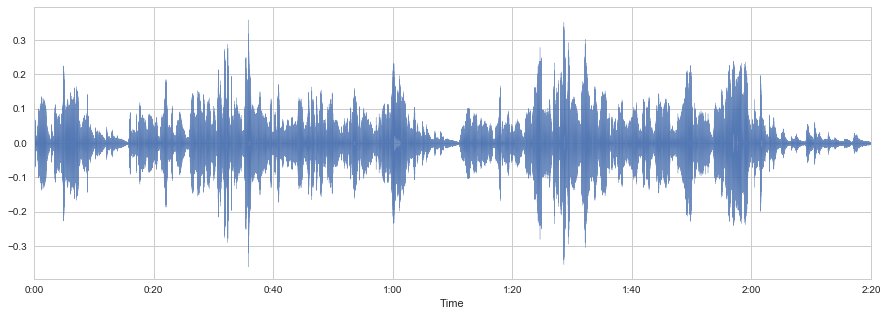

In [6]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr, alpha=0.8)

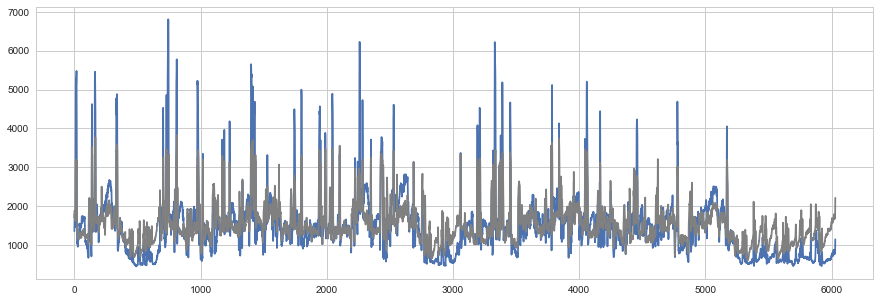

In [23]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr)
spectral_bandwidth = librosa.feature.spectral_bandwidth(x, sr)

plt.figure(figsize=(15, 5))
plt.plot(spectral_centroids[0])

plt.plot(spectral_bandwidth[0],color = 'grey')

In [27]:
import sklearn

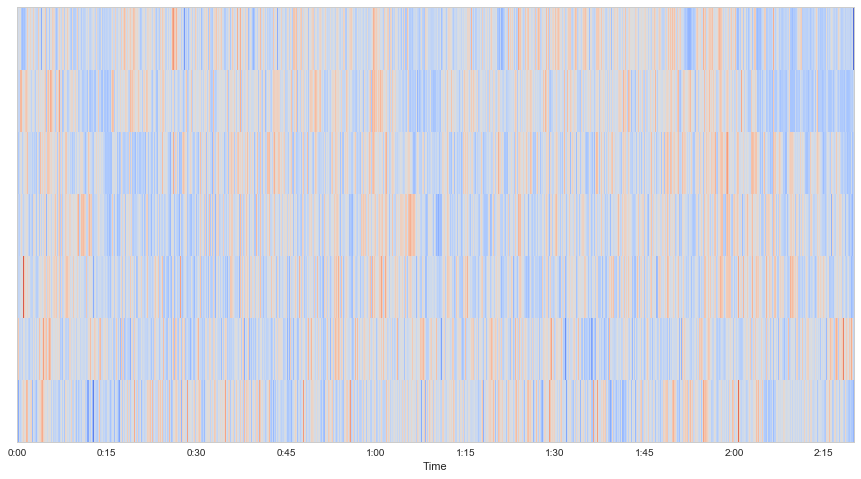

In [29]:
spectral_contrast = librosa.feature.spectral_contrast(x, sr)

# For visualization, scale each feature dimension to have zero mean and unit variance
spectral_contrast = sklearn.preprocessing.scale(spectral_contrast, axis=1)
plt.figure(figsize=(15, 8))

librosa.display.specshow(spectral_contrast, x_axis='time')

In [31]:
onset_env = librosa.onset.onset_strength(x, sr)
tempo = librosa.beat.estimate_tempo(onset_env, sr, start_bpm=60)
print tempo

54.978390957446805


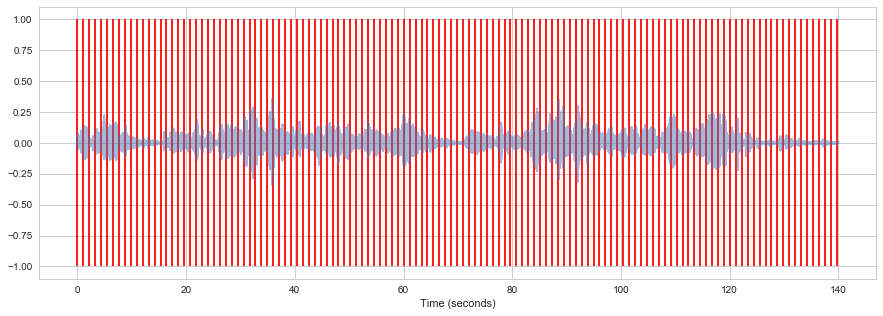

In [37]:
t = np.arange(0, len(x))/float(sr)
plt.figure(figsize = (15,5))
plt.plot(t, x, alpha=0.5)
plt.xlabel('Time (seconds)')

T = len(x)/float(sr)
seconds_per_beat = 60.0/tempo
beat_times = np.arange(0, T, seconds_per_beat)
plt.vlines(beat_times, -1, 1, color='r')

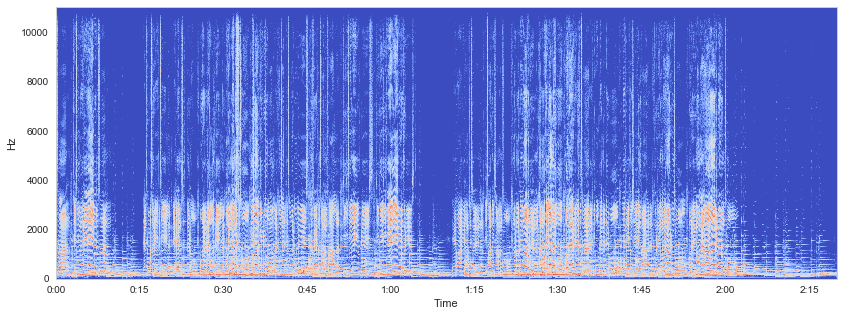

In [38]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

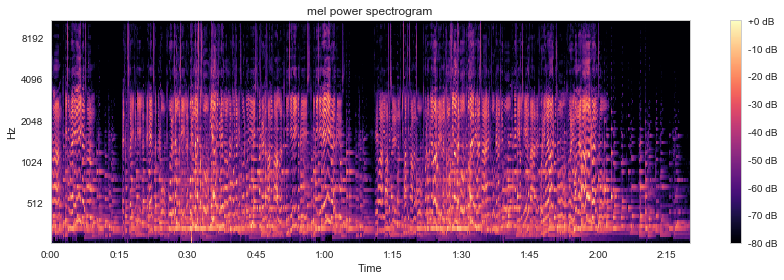

In [40]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(x, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()